In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

In [13]:
uploaded = files.upload()


Saving loan_prediction.csv to loan_prediction (1).csv


In [8]:
print("Uploaded files:", uploaded.keys())

Uploaded files: dict_keys(['loan_prediction.csv'])


In [14]:
df = pd.read_csv('loan_prediction (1).csv')


In [15]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

drop the load id column and move further

In [16]:
df=df.drop('Loan_ID',axis=1)

let's have a look if the data has missing values or not:

In [17]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


The data has missing values in some of the categorical columns and some numerical columns. Let's have a look at the descriptive statistics of the dataset before filling in the missing values:

In [18]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Now let's fill in the missing values. In categorical columns, we can fill in missing values with the mode of each column. The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data:

In [19]:
# Fill missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

<ipython-input-19-b8ce96aa13be>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-19-b8ce96aa13be>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

To fill in the missing values of numerical columns, we have to choose appropriate measures:

1. We can fill in the missing values of the loan amount column with the median value. The median is as appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data:

2.We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is as approprite metric to use;

3.We can fill in the missing values of the credit history column with the mode value. Since credit history is a binary variable (o or 1), the mode represents the most common value and is as appropriate choice for filling in missing values.

In [20]:
# Fill missing values in LoadAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

#Fill missing values in Loan_Amount_Term with the mode\
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

#Fill missing values in Credit_History with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Fill missing values in Credit_History with the mode

<ipython-input-20-b16c86faeabd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
<ipython-input-20-b16c86faeabd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Let's check missing values again

In [21]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


## Exploratory Data Analysis

let's have a look at the distibution of the loan status column:

In [22]:
import plotly.express as px

loan_status_count= df['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count,
                         names=loan_status_count.index,
                         title='Loan Approval Status')
fig_loan_status.show()

Now let's have a look at the distibution of the gender column;

In [23]:
gender_count= df['Gender'].value_counts()
fig_gender = px.bar(gender_count,
                    x=gender_count.index,
                    y=gender_count.values,
                    title='Gender Distribution')
fig_gender.show()

Now let's have a look at the distibution of the martial status column:

In [24]:
married_count= df['Married'].value_counts()
fig_married = px.bar(married_count,
                     x=married_count.index,
                     y=married_count.values,
                     title='Marital Status Distribution')
fig_married.show()

Now let's have a look at the distibution of the education column;

In [25]:
education_count= df['Education'].value_counts()
fig_education = px.bar(education_count,
                       x=education_count.index,
                       y=education_count.values,
                       title='Education Distribution')
fig_education.show()

Now let's have a look at the distibution of the self-employment column;

In [26]:
self_employed_count= df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count,
                           x=self_employed_count.index,
                           y=self_employed_count.values,
                           title='Self-Employed Distribution')
fig_self_employed.show()

In [27]:
import plotly.express as px

fig_applicant_income = px.histogram(df,x='ApplicantIncome',
                                     title='Applicant Income Distibution')
fig_applicant_income.show()

Now let's have a look at the relationship between the income of the loan applicant and the loan status.

In [28]:
fig_income= px.box(df,
                    x='Loan_Status',
                    y='ApplicantIncome',
                    color='Loan_Status',
                    title='Income vs Loan Status')
fig_income.show()

The "Applicantlncome" column contains outliers which need to be removed before moving further. Here's how to remove the outliers.

In [29]:
# Calculate the IQR
Q1=df['ApplicantIncome'].quantile(0.25)
Q3=df['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1

#Define the Lower and upper bounds for outliers.
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Remove the outliers
df=df[(df['ApplicantIncome']>=lower_bound) & (df['ApplicantIncome']<=upper_bound)]

Now let's have a look at the relationship between the income of the loan co-applicant and the loan status.

In [30]:
fig_coapplicant_income= px.box(df,
                               x='Loan_Status', # Corrected typo from 'Load_Status'
                               y='CoapplicantIncome',
                               color="Loan_Status",
                               title='Loan_Status vs LoanAmount')
fig_coapplicant_income.show()

The income of the loan co-applicant also contains outliers.Let's remove the outliers from this column as well:

In [31]:
#Calculate the IQR
Q1=df['CoapplicantIncome'].quantile(0.25)
Q3=df['CoapplicantIncome'].quantile(0.75)
IQR=Q3-Q1

#Define the lower and upper bounds for outliers.
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Remove the outliers
df=df[(df['CoapplicantIncome']>=lower_bound) & (df['CoapplicantIncome']<=upper_bound)]

Now let's have a look at the relationship between the loan amount and loan status:


In [32]:
fig_loan_amouny= px.box(df,
                         x='Loan_Status',
                         y='LoanAmount',
                         color='Loan_Status',
                         title='Loan_Status vs LoanAmount')
fig_loan_amouny.show()

Now let's have a look at the relationship between credit history and loan status:

In [33]:
fig_credit_history= px.histogram(df,
                            x='Loan_Status',
                            y='Credit_History',
                            color='Loan_Status',
                            title='Loan_Status vs Credit_History')
fig_credit_history.show()

In [34]:
fig_credit_history = px.histogram(df, x='Credit_History', color='Loan_Status',
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')
fig_credit_history.show()

Now let's have a look at the relationship between the property area and the loan status:

In [35]:
fig_property_area= px.histogram(df, x= 'Property_Area',color='Loan_Status',
                                 barmode='group',

                                 title='Loan_Status vs Property_Area')
fig_property_area.show()

## Data Preparation and Training Loan Approval Prediction Model.

In this step,

1.   Convert categorical columns into numerical ones:
2.   Split the data into training and test sets:
3. Scale the numerical features:
4. train the loan approval prediction model.





In [36]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [37]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Apply one-hot encoding to the categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True) # Use drop_first=True to avoid multicollinearity

# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [38]:
# Split the dataset into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print columns to verify
print("Columns in DataFrame df:", df.columns)

# Check if 'Loan_Status' exists before attempting to drop
if 'Loan_Status' in df.columns:
    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']
    print("Successfully split data into X and y.")
else:
    print("Error: 'Loan_Status' column not found in DataFrame.")
    print("Please check previous steps to ensure 'Loan_Status' column is present.")

Columns in DataFrame df: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')
Successfully split data into X and y.


In [39]:
#Scale the numerical columns using StadardScaler
scaler= StandardScaler()
numerical_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model=SVC(random_state=42)
model.fit(X_train,y_train)

SVC(random_state=42)

Now let's make predictions on the test set:

In [41]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']


Now let's add the predicted loan approaval values to the testing set as a new column in DataFrame called X_test_df and show the predicted loan approval values alongside the original features:


In [42]:
# Convernt X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted loan approval values to X_test_df
X_test_df['Predicted_Loan_Approval'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
277        -0.544528          -0.037922   -0.983772          0.305159   
84         -0.067325          -0.931554   -1.571353         -1.430680   
275        -0.734870           0.334654   -0.298262          0.305159   
392        -0.824919           0.522317   -0.200332          0.305159   
537        -0.267373          -0.931554   -0.454950          0.305159   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
277        0.402248         True         True         False         False   
84         0.402248         True         True          True         False   
275        0.402248         True         True          True         False   
392        0.402248         True         True         False         False   
537        0.402248         True        False         False          True   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
277          False               

Confusion Matrix:
[[17 18]
 [ 1 74]]

Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.49      0.64        35
           Y       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



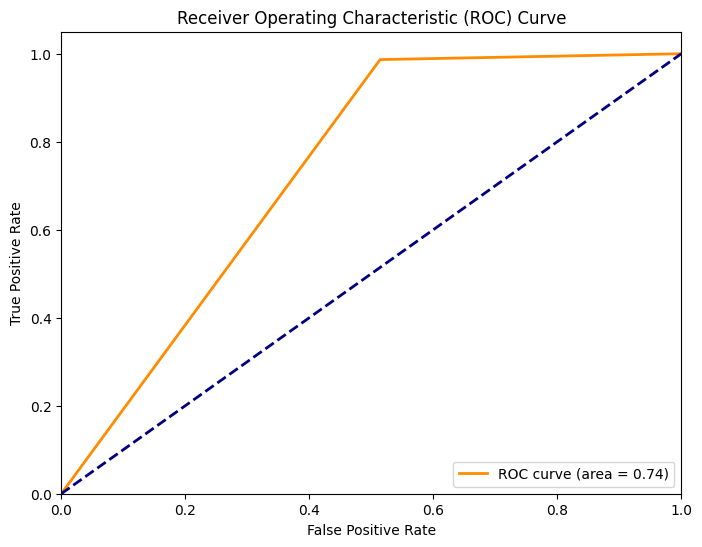

In [43]:
# prompt: can you visualize  Loan Approval Prediction Model

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize ROC curve
# Convert y_test and y_pred to numerical values if they are not already
y_test_numerical = y_test.apply(lambda x: 1 if x == 'Y' else 0)
y_pred_numerical = pd.Series(y_pred).apply(lambda x: 1 if x == 'Y' else 0)


fpr, tpr, thresholds = roc_curve(y_test_numerical, y_pred_numerical)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


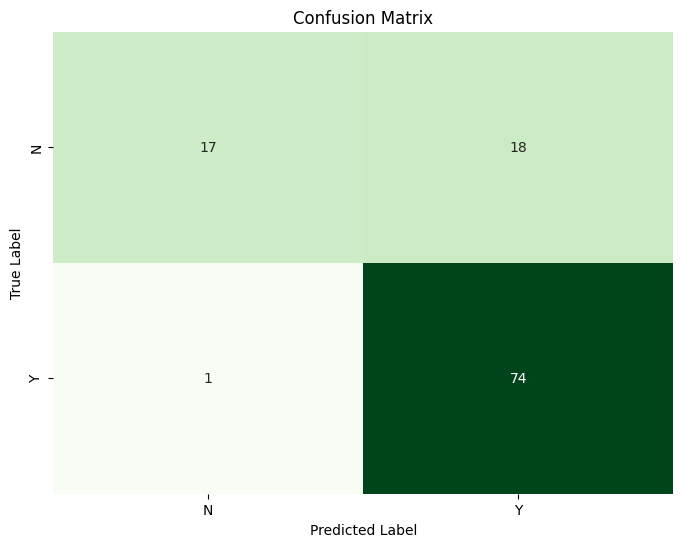

In [45]:
# prompt: Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['N', 'Y'],
            yticklabels=['N', 'Y'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


So This is how train a machine Learing model to predict loan approval using Python.

## Summary

Loan approval prediction incolves the analysis of various factors, such as the applicant's financial history, income, credit rating, employment status, and other relevant attributes. By leveraging historical loan data and applying machine learning algorithms, businesses can build models to determine loan approvals for new applicants.